In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #spliting
from sklearn.preprocessing import StandardScaler #Scaling
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap


In [2]:
df = pd.read_csv("Data.csv")
df_infos = df.iloc[:,:-1].values
df_results = df.iloc[:,-1].values

In [3]:
df_results_train , df_results_test , df_infos_train , df_infos_test = train_test_split(df_results, df_infos , test_size= 0.2, random_state= 1 )

In [4]:
sc = StandardScaler()
df_infos_train = sc.fit_transform(df_infos_train)
df_infos_test = sc.transform(df_infos_test)

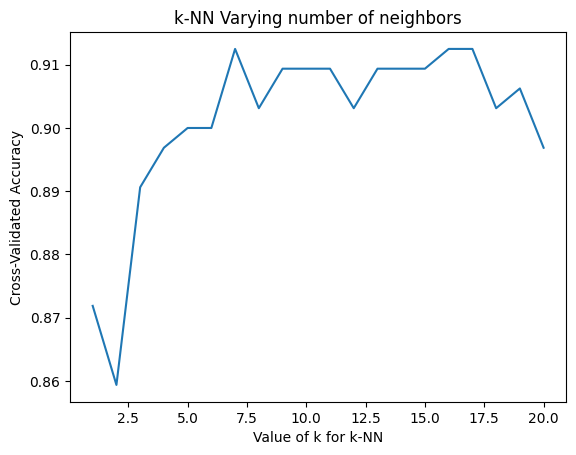

The optimal number of neighbors is 7


In [5]:
# Define the range of k values to test
k_range = range(1, 21)
k_scores = []

# Perform cross-validation for each k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, df_infos_train, df_results_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot the performance
plt.plot(k_range, k_scores)
plt.xlabel('Value of k for k-NN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('k-NN Varying number of neighbors')
plt.show()

# Find the optimal k
optimal_k = k_range[np.argmax(k_scores)]
print(f'The optimal number of neighbors is {optimal_k}')

In [6]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k, metric = 'minkowski',p = 2)
classifier.fit(df_infos_train,df_results_train)
pred_train = classifier.predict(df_infos_train)
np.set_printoptions(precision=2)
print(np.concatenate((pred_train.reshape(len(pred_train), 1) ,df_results_train.reshape(len(df_results_train), 1)), axis=1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]

In [7]:
classifier.predict(sc.transform([[30,87000]]))

array([0], dtype=int64)

In [8]:
cm = confusion_matrix(pred_train,df_results_train)
print(cm)
score = accuracy_score(pred_train,df_results_train)
print(score)

[[197  10]
 [ 12 101]]
0.93125


test Set

In [9]:
pred_test = classifier.predict(df_infos_test)
np.set_printoptions(precision=2)
print(np.concatenate((pred_test.reshape(len(pred_test), 1) ,df_results_test.reshape(len(df_results_test), 1)), axis=1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [10]:
cm = confusion_matrix(pred_test,df_results_test)
print(cm)
score = accuracy_score(pred_test,df_results_test)
print(score)

[[39  2]
 [ 9 30]]
0.8625
